In [437]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

In [438]:
cars = pd.read_csv("used_cars_data.csv")
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [439]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [440]:
cars.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [441]:
cars.shape

(7253, 14)

In [442]:
cars.drop(columns=['New_Price'], inplace=True)

In [443]:
cars.shape

(7253, 13)

In [444]:
cars.dropna(inplace=True)

In [445]:
cars.shape

(5975, 13)

In [446]:
#As mentioned in dataset car name has Brand and model so extracting it ,This can help to fill missing values of price column as brand 
cars['Brand'] = cars['Name'].str.split(' ').str[0] #Separating Brand name from the Name
cars['Model'] = cars['Name'].str.split(' ').str[1] + cars['Name'].str.split(' ').str[2]

In [447]:
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,WagonR
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta1.6
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,JazzV
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,ErtigaVDI
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4New


In [448]:
cars.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [449]:
col=['ISUZU','Isuzu','Mini','Land']
#correcting brand names
cars[cars.Brand.isin(col)].sample(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
1988,1988,Land Rover Freelander 2 SE,Mumbai,2012,34000,Diesel,Automatic,First,12.39 kmpl,2179 CC,147.51 bhp,5.0,19.25,Land,RoverFreelander
480,480,Land Rover Range Rover Evoque 2.0 TD4 Pure,Delhi,2015,24000,Diesel,Automatic,Second,15.68 kmpl,1999 CC,177 bhp,5.0,33.50,Land,RoverRange
1038,1038,Land Rover Range Rover TDV8 (Diesel),Bangalore,2011,55000,Diesel,Automatic,First,10.2 kmpl,4367 CC,308 bhp,7.0,67.00,Land,RoverRange
3218,3218,Land Rover Range Rover 2.2L Dynamic,Pune,2015,52000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,39.75,Land,RoverRange
5311,5311,Land Rover Freelander 2 TD4 SE,Hyderabad,2012,139000,Diesel,Automatic,First,0.0 kmpl,2179 CC,115 bhp,5.0,16.75,Land,RoverFreelander


In [450]:
cars.loc[cars.Brand == 'ISUZU','Brand']='Isuzu'
cars.loc[cars.Brand=='Mini','Brand']='Mini Cooper'
cars.loc[cars.Brand=='Land','Brand']='Land Rover'

In [451]:
cars.Model.isnull().sum()

0

In [452]:
cars.dropna(subset=['Model'],axis=0,inplace=True)

In [453]:
cars['Fuel_Type'].value_counts()

Diesel    3195
Petrol    2714
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

In [454]:
cars['Mileage'].value_counts()

18.9 kmpl      172
17.0 kmpl      170
18.6 kmpl      119
20.36 kmpl      88
21.1 kmpl       86
17.8 kmpl       85
16.0 kmpl       76
20.0 kmpl       70
12.8 kmpl       70
18.0 kmpl       69
18.5 kmpl       67
22.7 kmpl       66
13.0 kmpl       66
15.1 kmpl       64
16.8 kmpl       59
16.47 kmpl      58
12.99 kmpl      58
0.0 kmpl        56
23.1 kmpl       52
25.8 kmpl       51
22.32 kmpl      50
19.7 kmpl       47
22.9 kmpl       47
24.3 kmpl       43
17.5 kmpl       43
13.5 kmpl       42
11.5 kmpl       41
24.0 kmpl       41
15.0 kmpl       41
19.3 kmpl       40
28.4 kmpl       40
21.4 kmpl       40
19.81 kmpl      40
19.4 kmpl       40
17.01 kmpl      40
19.01 kmpl      39
19.1 kmpl       39
22.07 kmpl      39
17.9 kmpl       38
19.0 kmpl       38
23.4 kmpl       38
12.05 kmpl      38
20.77 kmpl      36
17.4 kmpl       35
16.1 kmpl       35
23.59 kmpl      34
16.55 kmpl      34
19.67 kmpl      34
14.0 kmpl       34
21.9 kmpl       34
12.55 kmpl      34
20.14 kmpl      33
20.54 kmpl  

In [455]:
cars['Mileage'][0].split(" ")[1]

'km/kg'

In [456]:
cars['Mileage'] = cars['Mileage'].astype(str)

In [457]:
cars['Mileage'].shape

(5975,)

In [458]:
cars['Mileage'] = cars['Mileage'].dropna()

In [459]:
cars.isna().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
dtype: int64

In [460]:
cars['Mileage'].shape

(5975,)

In [461]:
mile_unit = []
for i in range (len(cars['Mileage'])):
    try:
        mile_unit.append(cars['Mileage'][i].split(" ")[1])
    except:
        print(i)

set(mile_unit)

194
208
229
733
749
1294
1327
1385
1460
1917
2074
2096
2264
2325
2335
2369
2530
2542
2623
2668
2737
2780
2842
3272
3404
3520
3522
3800
3810
3882
4011
4152
4229
4446
4577
4604
4697
4712
4904
4952
5015
5185
5270
5893


{'km/kg', 'kmpl'}

In [462]:
cars.drop(cars[cars['Mileage'] == 'nan'].index, inplace=True)

In [463]:
mileage_num = []

for i in  cars['Mileage']:
    val = i.split(" ")
    if val[1]=='kmpl':
        mileage_num.append(round(float(val[0]),2))
    else:
        mileage_num.append( round(( float (val[0]) /0.832 ),2) )

cars['mileage_num'] = mileage_num
    
    
       

In [464]:
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,mileage_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,WagonR,31.97
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta1.6,19.67
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,JazzV,18.20
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,ErtigaVDI,20.77
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4New,15.20


In [465]:
cars.isna().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
mileage_num          0
dtype: int64

In [466]:
cars.drop(columns=['Mileage'], inplace=True)

In [467]:
cars['Engine'].value_counts()

1197 CC    606
1248 CC    512
1498 CC    303
998 CC     259
2179 CC    240
1497 CC    229
1198 CC    227
1968 CC    216
1995 CC    183
1461 CC    152
2143 CC    149
1582 CC    145
1199 CC    143
1598 CC    141
1396 CC    139
796 CC     129
2494 CC    121
1086 CC    108
1591 CC     94
2993 CC     90
1399 CC     88
2982 CC     86
1798 CC     84
2987 CC     67
2967 CC     61
814 CC      59
1120 CC     54
1196 CC     50
1373 CC     47
1364 CC     47
1493 CC     46
2354 CC     41
1298 CC     39
2755 CC     38
799 CC      36
1991 CC     33
1896 CC     32
1799 CC     32
999 CC      29
1998 CC     28
1061 CC     27
1796 CC     25
624 CC      25
1496 CC     25
2393 CC     24
1586 CC     23
1193 CC     23
1499 CC     21
936 CC      21
1997 CC     21
1794 CC     20
2148 CC     19
1405 CC     19
1999 CC     18
2523 CC     17
1984 CC     17
2199 CC     17
2498 CC     16
3198 CC     15
1495 CC     15
1186 CC     14
993 CC      14
1956 CC     14
2499 CC     14
2696 CC     13
3498 CC     12
2497 CC   

In [468]:
cars['Engine'] = cars['Engine'].dropna()

In [469]:
cars.shape

(5975, 15)

In [470]:
temp = []
for i in cars['Engine']:
    temp.append(i.split(" ")[1])
set(temp)

{'CC'}

In [471]:
engine_num = []
for i in cars['Engine']:
    val = i.split(" ")
    engine_num.append(float(val[0]))

cars['engine_num'] = engine_num

In [472]:
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Brand,Model,mileage_num,engine_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998 CC,58.16 bhp,5.0,1.75,Maruti,WagonR,31.97,998.0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta1.6,19.67,1582.0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199 CC,88.7 bhp,5.0,4.50,Honda,JazzV,18.20,1199.0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248 CC,88.76 bhp,7.0,6.00,Maruti,ErtigaVDI,20.77,1248.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968 CC,140.8 bhp,5.0,17.74,Audi,A4New,15.20,1968.0


In [473]:
cars.drop(columns=['Engine'], inplace=True)

In [474]:
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Power,Seats,Price,Brand,Model,mileage_num,engine_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,58.16 bhp,5.0,1.75,Maruti,WagonR,31.97,998.0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,126.2 bhp,5.0,12.50,Hyundai,Creta1.6,19.67,1582.0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,88.7 bhp,5.0,4.50,Honda,JazzV,18.20,1199.0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,88.76 bhp,7.0,6.00,Maruti,ErtigaVDI,20.77,1248.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,140.8 bhp,5.0,17.74,Audi,A4New,15.20,1968.0


In [475]:
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Power,Seats,Price,Brand,Model,mileage_num,engine_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,58.16 bhp,5.0,1.75,Maruti,WagonR,31.97,998.0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,126.2 bhp,5.0,12.50,Hyundai,Creta1.6,19.67,1582.0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,88.7 bhp,5.0,4.50,Honda,JazzV,18.20,1199.0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,88.76 bhp,7.0,6.00,Maruti,ErtigaVDI,20.77,1248.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,140.8 bhp,5.0,17.74,Audi,A4New,15.20,1968.0


In [476]:
cars['Transmission'].value_counts()

Manual       4266
Automatic    1709
Name: Transmission, dtype: int64

In [477]:
cars.drop(columns=['Name'], inplace=True)
cars.head()

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Power,Seats,Price,Brand,Model,mileage_num,engine_num
0,0,Mumbai,2010,72000,CNG,Manual,First,58.16 bhp,5.0,1.75,Maruti,WagonR,31.97,998.0
1,1,Pune,2015,41000,Diesel,Manual,First,126.2 bhp,5.0,12.50,Hyundai,Creta1.6,19.67,1582.0
2,2,Chennai,2011,46000,Petrol,Manual,First,88.7 bhp,5.0,4.50,Honda,JazzV,18.20,1199.0
3,3,Chennai,2012,87000,Diesel,Manual,First,88.76 bhp,7.0,6.00,Maruti,ErtigaVDI,20.77,1248.0
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,140.8 bhp,5.0,17.74,Audi,A4New,15.20,1968.0


In [478]:
temp = []
for i in cars['Power']:
    temp.append(i.split(" ")[1])
set(temp)

{'bhp'}

In [479]:
cars['Power'].value_counts()

74 bhp         235
98.6 bhp       131
73.9 bhp       125
140 bhp        123
78.9 bhp       111
67.04 bhp      107
67.1 bhp       107
null bhp       103
82 bhp         101
88.5 bhp       100
117.3 bhp       93
118 bhp         90
121.3 bhp       88
190 bhp         79
126.2 bhp       78
170 bhp         77
70 bhp          75
88.7 bhp        75
86.8 bhp        74
80 bhp          74
174.33 bhp      71
81.86 bhp       71
103.6 bhp       69
81.83 bhp       68
68 bhp          62
68.05 bhp       61
85.8 bhp        59
184 bhp         58
102 bhp         57
120 bhp         57
88.8 bhp        57
55.2 bhp        56
100 bhp         54
90 bhp          52
108.45 bhp      50
126.32 bhp      49
47.3 bhp        48
88.73 bhp       48
168.5 bhp       47
67 bhp          45
88.76 bhp       45
81.80 bhp       44
138.1 bhp       44
83.1 bhp        44
86.7 bhp        43
46.3 bhp        42
89.84 bhp       40
241.4 bhp       40
75 bhp          40
83.8 bhp        39
100.6 bhp       39
258 bhp         38
108.5 bhp   

In [480]:
pd.set_option('display.max_rows', None)

In [481]:
power_num = []
count = 0
for i in cars['Power']:
    try:
        power_num.append(float(i.split(" ")[0]))
    except:
        power_num.append(0)
count
cars['power_num'] = power_num

In [482]:
cars['Power'][76]

'null bhp'

In [483]:
cars.head()

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Power,Seats,Price,Brand,Model,mileage_num,engine_num,power_num
0,0,Mumbai,2010,72000,CNG,Manual,First,58.16 bhp,5.0,1.75,Maruti,WagonR,31.97,998.0,58.16
1,1,Pune,2015,41000,Diesel,Manual,First,126.2 bhp,5.0,12.50,Hyundai,Creta1.6,19.67,1582.0,126.20
2,2,Chennai,2011,46000,Petrol,Manual,First,88.7 bhp,5.0,4.50,Honda,JazzV,18.20,1199.0,88.70
3,3,Chennai,2012,87000,Diesel,Manual,First,88.76 bhp,7.0,6.00,Maruti,ErtigaVDI,20.77,1248.0,88.76
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,140.8 bhp,5.0,17.74,Audi,A4New,15.20,1968.0,140.80


In [484]:
cars.drop(columns=['Power'], inplace=True)
cars.head()

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,mileage_num,engine_num,power_num
0,0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,WagonR,31.97,998.0,58.16
1,1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,Creta1.6,19.67,1582.0,126.20
2,2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,JazzV,18.20,1199.0,88.70
3,3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,ErtigaVDI,20.77,1248.0,88.76
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,A4New,15.20,1968.0,140.80


In [485]:
cars['Owner_Type'].value_counts()

First             4903
Second             953
Third              111
Fourth & Above       8
Name: Owner_Type, dtype: int64

In [486]:
cars['Owner_Type'] = cars['Owner_Type'].replace("First", 1)
cars['Owner_Type'] = cars['Owner_Type'].replace("Second", 2)
cars['Owner_Type'] = cars['Owner_Type'].replace("Third", 3)
cars['Owner_Type'] = cars['Owner_Type'].replace("Fourth & Above", 4)

In [487]:
cars.head()

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,mileage_num,engine_num,power_num
0,0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,WagonR,31.97,998.0,58.16
1,1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,Creta1.6,19.67,1582.0,126.20
2,2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,JazzV,18.20,1199.0,88.70
3,3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,ErtigaVDI,20.77,1248.0,88.76
4,4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,A4New,15.20,1968.0,140.80


In [488]:
cars.isna().sum()

S.No.                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
Brand                0
Model                0
mileage_num          0
engine_num           0
power_num            0
dtype: int64

In [489]:
cars.drop(columns=['S.No.', 'Location', 'Model'], inplace=True)

In [490]:
cars.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,mileage_num,engine_num,power_num
0,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,31.97,998.0,58.16
1,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,1582.0,126.20
2,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,1199.0,88.70
3,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,1248.0,88.76
4,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,1968.0,140.80


In [491]:
cars.shape

(5975, 11)

In [492]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5975 non-null   int64  
 1   Kilometers_Driven  5975 non-null   int64  
 2   Fuel_Type          5975 non-null   object 
 3   Transmission       5975 non-null   object 
 4   Owner_Type         5975 non-null   int64  
 5   Seats              5975 non-null   float64
 6   Price              5975 non-null   float64
 7   Brand              5975 non-null   object 
 8   mileage_num        5975 non-null   float64
 9   engine_num         5975 non-null   float64
 10  power_num          5975 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 689.2+ KB


In [493]:
cars.describe()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,mileage_num,engine_num,power_num
count,5975.000000,5.975000e+03,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,1.200669,5.278828,9.501647,18.234055,1621.606695,111.324171
std,3.247238,9.155851e+04,0.453458,0.808959,11.205736,4.646773,601.036987,55.413209
min,1998.000000,1.710000e+02,1.000000,0.000000,0.440000,0.000000,624.000000,0.000000
25%,2012.000000,3.390800e+04,1.000000,5.000000,3.500000,15.260000,1198.000000,74.000000
50%,2014.000000,5.300000e+04,1.000000,5.000000,5.650000,18.190000,1493.000000,92.700000
75%,2016.000000,7.300000e+04,1.000000,5.000000,9.950000,21.100000,1984.000000,138.100000
max,2019.000000,6.500000e+06,4.000000,10.000000,160.000000,40.310000,5998.000000,560.000000


In [494]:
sns.set(rc={'figure.figsize':(9,7)})

<AxesSubplot:xlabel='mileage_num'>

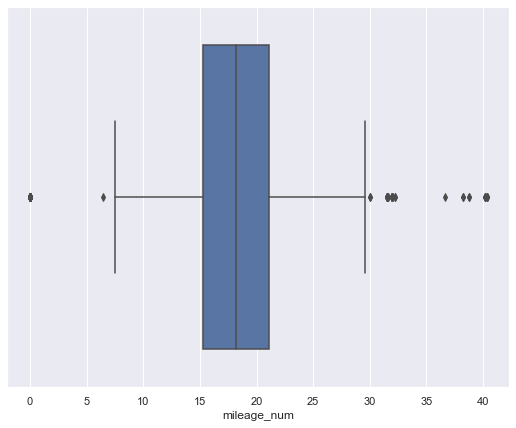

In [495]:
sns.boxplot(data=cars, x='mileage_num')

<AxesSubplot:xlabel='power_num'>

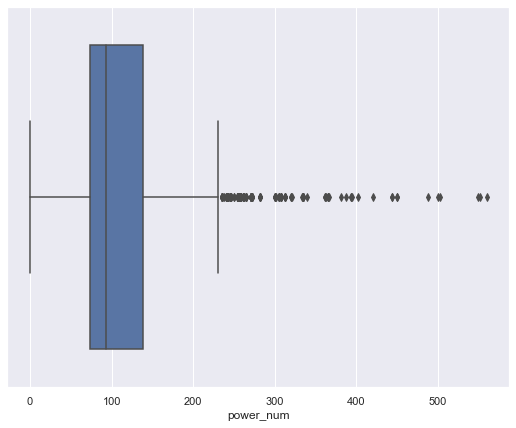

In [496]:
sns.boxplot(data=cars, x='power_num')

In [497]:
cars = cars[cars['power_num'] != 0]

In [498]:
cars.shape

(5872, 11)

<AxesSubplot:xlabel='mileage_num'>

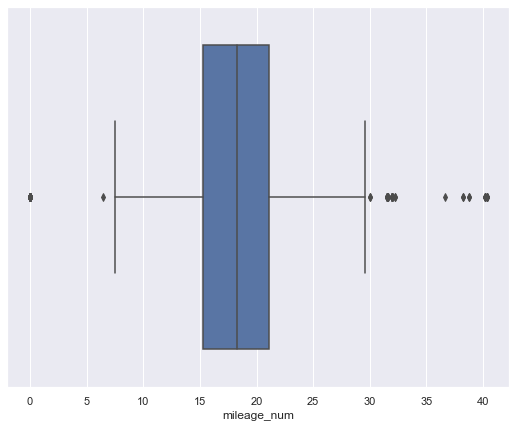

In [499]:
sns.boxplot(data=cars, x='mileage_num')

<AxesSubplot:xlabel='engine_num'>

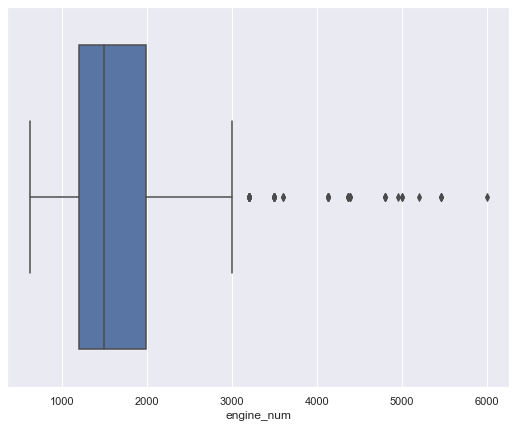

In [500]:
sns.boxplot(data=cars, x='engine_num')

<AxesSubplot:xlabel='Kilometers_Driven'>

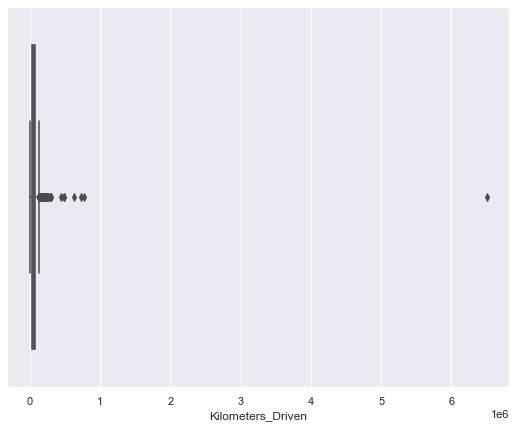

In [501]:
sns.boxplot(data=cars, x='Kilometers_Driven')

In [502]:
car_copy = cars.copy()

In [503]:
cars.shape, car_copy.shape

((5872, 11), (5872, 11))

In [504]:
def remove_outliers(column):
    Q1 = cars[column].quantile(0.25)
    Q3 = cars[column].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Create a boolean mask that is True for values that are within 1.5 times the IQR of the 25th and 75th percentiles
    mask = (cars[column] >= Q1 - 1.5 * IQR) & (cars[column] <= Q3 + 1.5 * IQR)
    
    df = cars[mask]
    return df

In [505]:
cars = remove_outliers('engine_num')

<AxesSubplot:xlabel='engine_num'>

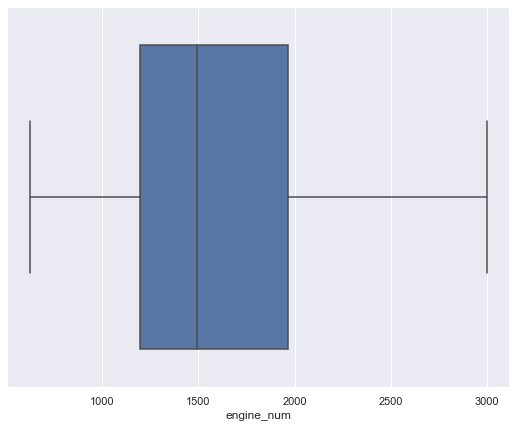

In [506]:
sns.boxplot(data=cars, x='engine_num')

In [507]:
cars.shape

(5814, 11)

In [508]:
cars = remove_outliers('power_num')

<AxesSubplot:xlabel='power_num'>

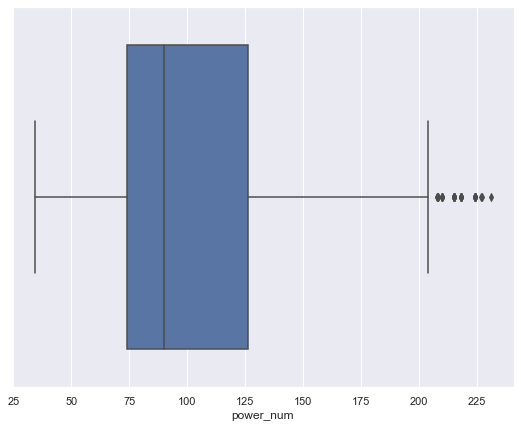

In [509]:
sns.boxplot(data=cars, x='power_num')

In [510]:
cars.shape

(5618, 11)

In [511]:
cars = remove_outliers('mileage_num')

<AxesSubplot:xlabel='mileage_num'>

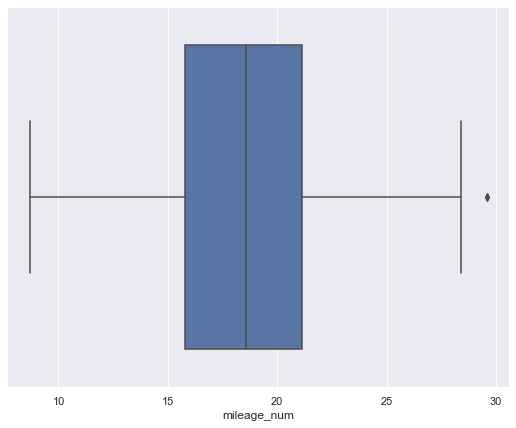

In [512]:
sns.boxplot(data=cars, x='mileage_num')

In [513]:
cars.shape

(5552, 11)

In [514]:
cars = remove_outliers('Kilometers_Driven')


<AxesSubplot:xlabel='Kilometers_Driven'>

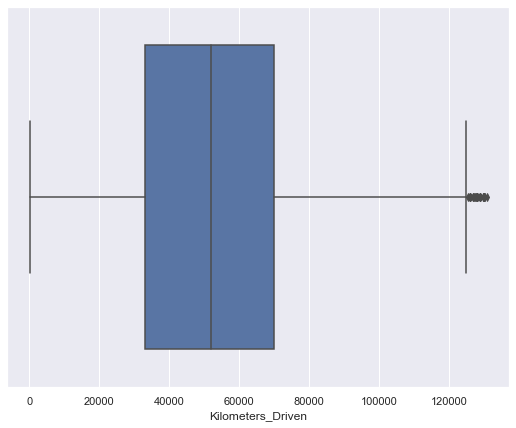

In [515]:
sns.boxplot(data=cars, x='Kilometers_Driven')

In [516]:
cars.shape

(5358, 11)

In [517]:
cars.describe()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,mileage_num,engine_num,power_num
count,5358.000000,5358.000000,5358.000000,5358.000000,5358.000000,5358.000000,5358.000000,5358.000000
mean,2013.589586,53212.958567,1.185890,5.260732,8.261924,18.633518,1543.103583,106.149492
std,3.104385,26822.564650,0.434393,0.750429,8.047860,3.973049,483.788291,40.457878
min,1998.000000,171.000000,1.000000,2.000000,0.440000,8.700000,624.000000,34.200000
25%,2012.000000,33000.000000,1.000000,5.000000,3.500000,16.000000,1197.000000,74.000000
50%,2014.000000,52000.000000,1.000000,5.000000,5.500000,18.600000,1461.000000,90.000000
75%,2016.000000,70000.000000,1.000000,5.000000,9.100000,21.380000,1968.000000,126.320000
max,2019.000000,130790.000000,4.000000,10.000000,61.250000,29.570000,2999.000000,231.100000


In [518]:
car_iqr = cars.copy()

car_iqr.shape, cars.shape

((5358, 11), (5358, 11))

In [519]:
cars.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,mileage_num,engine_num,power_num
1,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,1582.0,126.20
2,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,1199.0,88.70
3,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,1248.0,88.76
4,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,1968.0,140.80
5,2012,75000,LPG,Manual,1,5.0,2.35,Hyundai,25.36,814.0,55.20


In [520]:
cars.shape

(5358, 11)

<AxesSubplot:>

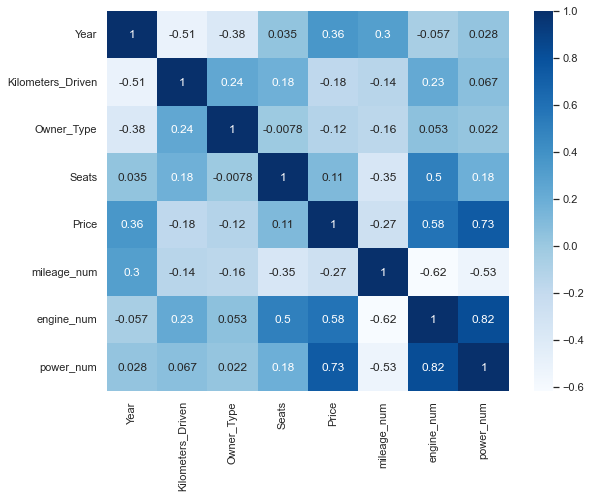

In [521]:
sns.heatmap(data=cars.corr(), annot=True, cmap='Blues')

In [522]:
cars['Seats'].value_counts()

5.0     4612
7.0      543
8.0      108
4.0       61
6.0       26
10.0       4
2.0        2
9.0        2
Name: Seats, dtype: int64

In [523]:
cars['Fuel_Type'].value_counts()

Diesel    2769
Petrol    2565
CNG         17
LPG          7
Name: Fuel_Type, dtype: int64

In [524]:
cars['Fuel_Type'].replace(['LPG', 'CNG'], 'Other', inplace=True)

In [525]:
cars['Fuel_Type'].value_counts()

Diesel    2769
Petrol    2565
Other       24
Name: Fuel_Type, dtype: int64

In [526]:
fuel_df = pd.get_dummies(cars['Fuel_Type'])
cars = pd.concat([cars, fuel_df], axis=1)

In [527]:
brand_df = pd.get_dummies(cars['Brand'])
cars = pd.concat([cars, brand_df], axis=1)

In [528]:
cars.isna().sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
Brand                0
mileage_num          0
engine_num           0
power_num            0
Diesel               0
Other                0
Petrol               0
Ambassador           0
Audi                 0
BMW                  0
Chevrolet            0
Datsun               0
Fiat                 0
Force                0
Ford                 0
Honda                0
Hyundai              0
Isuzu                0
Jaguar               0
Jeep                 0
Land Rover           0
Mahindra             0
Maruti               0
Mercedes-Benz        0
Mini Cooper          0
Mitsubishi           0
Nissan               0
Renault              0
Skoda                0
Tata                 0
Toyota               0
Volkswagen           0
Volvo                0
dtype: int64

In [529]:
cars.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,mileage_num,engine_num,...,Mercedes-Benz,Mini Cooper,Mitsubishi,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
1,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,1582.0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,1199.0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,1248.0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,1968.0,...,0,0,0,0,0,0,0,0,0,0
5,2012,75000,Other,Manual,1,5.0,2.35,Hyundai,25.36,814.0,...,0,0,0,0,0,0,0,0,0,0


In [530]:
cars.drop(columns=['Brand'], inplace=True)

In [531]:
transmission = {'Automatic':1, 'Manual': 0}

cars['Transmission'] = cars['Transmission'].map(transmission)

In [532]:
cars.isna().sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
mileage_num          0
engine_num           0
power_num            0
Diesel               0
Other                0
Petrol               0
Ambassador           0
Audi                 0
BMW                  0
Chevrolet            0
Datsun               0
Fiat                 0
Force                0
Ford                 0
Honda                0
Hyundai              0
Isuzu                0
Jaguar               0
Jeep                 0
Land Rover           0
Mahindra             0
Maruti               0
Mercedes-Benz        0
Mini Cooper          0
Mitsubishi           0
Nissan               0
Renault              0
Skoda                0
Tata                 0
Toyota               0
Volkswagen           0
Volvo                0
dtype: int64

In [533]:
cars.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage_num,engine_num,power_num,...,Mercedes-Benz,Mini Cooper,Mitsubishi,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
1,2015,41000,Diesel,0,1,5.0,12.50,19.67,1582.0,126.20,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,Petrol,0,1,5.0,4.50,18.20,1199.0,88.70,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,Diesel,0,1,7.0,6.00,20.77,1248.0,88.76,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,Diesel,1,2,5.0,17.74,15.20,1968.0,140.80,...,0,0,0,0,0,0,0,0,0,0
5,2012,75000,Other,0,1,5.0,2.35,25.36,814.0,55.20,...,0,0,0,0,0,0,0,0,0,0


In [534]:
cars.columns

Index(['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Seats', 'Price', 'mileage_num', 'engine_num', 'power_num', 'Diesel',
       'Other', 'Petrol', 'Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep',
       'Land Rover', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini Cooper',
       'Mitsubishi', 'Nissan', 'Renault', 'Skoda', 'Tata', 'Toyota',
       'Volkswagen', 'Volvo'],
      dtype='object')

In [535]:
brands = ['Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep',
       'Land Rover', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini Cooper',
       'Mitsubishi', 'Nissan', 'Renault', 'Skoda', 'Tata', 'Toyota',
       'Volkswagen', 'Volvo']

In [536]:
cars.drop(columns=['Fuel_Type'], inplace=True)

In [537]:
cars.head()

,Year,Kilometers_Driven,Transmission,Owner_Type,Seats,Price,mileage_num,engine_num,power_num,Diesel,...,Mercedes-Benz,Mini Cooper,Mitsubishi,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
1,2015,41000,0,1,5.0,12.50,19.67,1582.0,126.20,1,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,0,1,5.0,4.50,18.20,1199.0,88.70,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,0,1,7.0,6.00,20.77,1248.0,88.76,1,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,1,2,5.0,17.74,15.20,1968.0,140.80,1,...,0,0,0,0,0,0,0,0,0,0
5,2012,75000,0,1,5.0,2.35,25.36,814.0,55.20,0,...,0,0,0,0,0,0,0,0,0,0


In [538]:
cars['km_by_owner'] = cars['Kilometers_Driven']/cars['Owner_Type']

<AxesSubplot:>

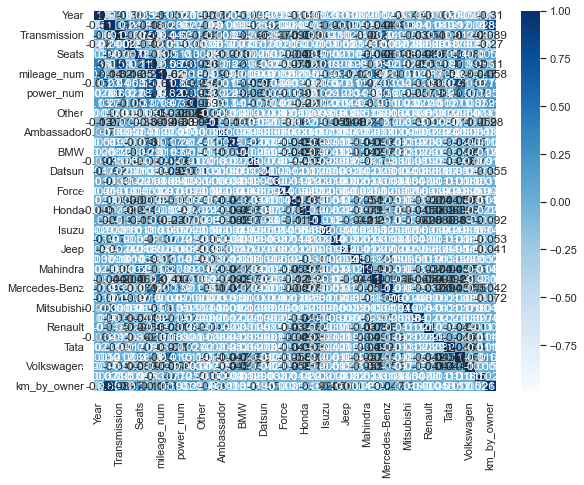

In [539]:
sns.heatmap(data=cars.corr(), annot=True, cmap='Blues')

In [540]:
cars.head()

,Year,Kilometers_Driven,Transmission,Owner_Type,Seats,Price,mileage_num,engine_num,power_num,Diesel,...,Mini Cooper,Mitsubishi,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,km_by_owner
1,2015,41000,0,1,5.0,12.50,19.67,1582.0,126.20,1,...,0,0,0,0,0,0,0,0,0,41000.0
2,2011,46000,0,1,5.0,4.50,18.20,1199.0,88.70,0,...,0,0,0,0,0,0,0,0,0,46000.0
3,2012,87000,0,1,7.0,6.00,20.77,1248.0,88.76,1,...,0,0,0,0,0,0,0,0,0,87000.0
4,2013,40670,1,2,5.0,17.74,15.20,1968.0,140.80,1,...,0,0,0,0,0,0,0,0,0,20335.0
5,2012,75000,0,1,5.0,2.35,25.36,814.0,55.20,0,...,0,0,0,0,0,0,0,0,0,75000.0


In [541]:
y = cars[['Price']]
cars.pop('Price')

1       12.50
2        4.50
3        6.00
4       17.74
5        2.35
6        3.50
7       17.50
8        5.20
9        1.95
10       9.95
11       4.49
12       5.60
13      27.00
15      15.00
16       5.40
17       5.99
18       6.34
19      28.00
20      18.55
21       8.25
22      23.50
23       1.87
24       2.85
25       4.25
26       4.25
27       2.75
28       9.90
30       7.75
31       6.75
32      12.50
33      11.50
34       6.98
35       1.85
36       8.63
37       4.85
39       5.00
40       1.25
41       1.53
42       5.58
43       4.74
44       8.85
45      10.11
46       4.25
47      10.95
48       3.85
49       5.50
50      21.43
51       4.25
52       3.30
53       3.85
54       3.60
55       3.99
56       3.30
57       2.07
58       7.75
59       2.25
60      16.50
61       2.75
62      26.70
63      10.00
65      13.50
66       1.85
68       8.15
69      10.50
71       9.65
72       3.48
73       6.92
74       6.46
75      29.50
78      11.75
80       3.75
81    

In [542]:
num_vars_new = ['Year',  'Transmission', 'mileage_num', 'engine_num', 'power_num', 'Diesel', 'Other', 'Petrol', 'Kilometers_Driven'] +brands

In [543]:
X_new = cars[num_vars_new]

In [544]:
X_new.head()

,Year,Transmission,mileage_num,engine_num,power_num,Diesel,Other,Petrol,Kilometers_Driven,Ambassador,...,Mercedes-Benz,Mini Cooper,Mitsubishi,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
1,2015,0,19.67,1582.0,126.20,1,0,0,41000,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,0,18.20,1199.0,88.70,0,0,1,46000,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,0,20.77,1248.0,88.76,1,0,0,87000,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,1,15.20,1968.0,140.80,1,0,0,40670,0,...,0,0,0,0,0,0,0,0,0,0
5,2012,0,25.36,814.0,55.20,0,1,0,75000,0,...,0,0,0,0,0,0,0,0,0,0


In [545]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=42)

In [546]:
scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [547]:
X_train[num_vars_new] = scaler.fit_transform(X_train[num_vars_new])
X_test[num_vars_new] = scaler.fit_transform(X_test[num_vars_new])

In [548]:
X_train.head()

,Year,Transmission,mileage_num,engine_num,power_num,Diesel,Other,Petrol,Kilometers_Driven,Ambassador,...,Mercedes-Benz,Mini Cooper,Mitsubishi,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
2478,-0.190123,-0.597857,-0.256215,-0.093717,-0.424250,-1.027762,-0.061214,1.035472,0.536819,-0.015778,...,-0.222171,-0.074199,-0.067082,-0.125189,-0.169334,-0.178448,-0.173944,3.849532,-0.245272,-0.06323
5375,0.452631,-0.597857,2.457911,-0.599329,-0.786225,0.972988,-0.061214,-0.965743,-0.509685,-0.015778,...,-0.222171,-0.074199,-0.067082,-0.125189,-0.169334,-0.178448,-0.173944,-0.259772,-0.245272,-0.06323
5849,0.774008,-0.597857,1.812049,-0.089639,-0.174780,0.972988,-0.061214,-0.965743,2.296155,-0.015778,...,-0.222171,-0.074199,-0.067082,-0.125189,-0.169334,-0.178448,-0.173944,-0.259772,-0.245272,-0.06323
3860,1.095385,-0.597857,0.070485,-0.703306,-0.590563,-1.027762,-0.061214,1.035472,-1.099980,-0.015778,...,-0.222171,-0.074199,-0.067082,-0.125189,-0.169334,-0.178448,-0.173944,-0.259772,-0.245272,-0.06323
1910,-1.797007,-0.597857,-1.311709,0.513834,0.461122,-1.027762,-0.061214,1.035472,0.365267,-0.015778,...,-0.222171,-0.074199,-0.067082,-0.125189,-0.169334,-0.178448,-0.173944,3.849532,-0.245272,-0.06323


In [549]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [550]:
y_pred = lr.predict(X_test)
r2_score(y_pred, y_test)

-1.2383427616668996e-11

In [588]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor

In [551]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
print(r2_score(y_pred_rfr, y_test))

C:\Users\patil\AppData\Local\Temp\ipykernel_18548\1117315268.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


0.8775648224734744


In [591]:
model = ExtraTreesRegressor()
model.fit(X_train, y_train)
y_pred_model = model.predict(X_test)
print(r2_score(y_pred_model, y_test))

C:\Users\patil\AppData\Local\Temp\ipykernel_18548\1871877894.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9084525283229162


In [552]:
print(mean_absolute_error(y_pred_rfr, y_test))

1.506027498578536


In [553]:
print(mean_squared_error(y_pred_rfr, y_test))

7.433423780949488


In [554]:
import xgboost as xgb

In [555]:
xg = xgb.XGBRegressor()
xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)
print(r2_score(y_pred_xg, y_test))

0.9080151130143738


In [556]:
print(mean_absolute_error(y_pred_xg, y_test))
print(mean_squared_error(y_pred_xg, y_test))
print(np.sqrt(mean_squared_error(y_pred_xg, y_test)))

1.370521456722893
5.890422002101988
2.427019159813533


Text(0, 0.5, 'y_pred')

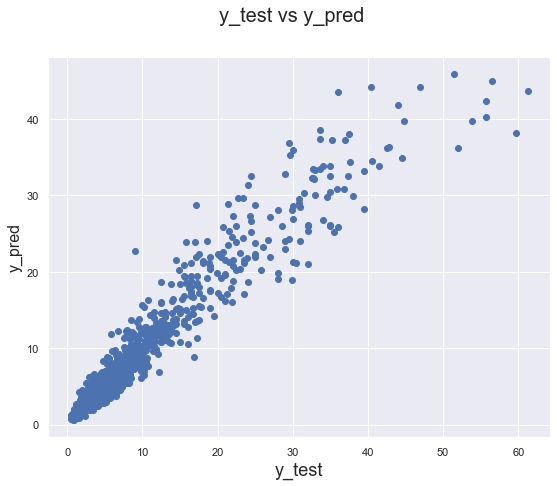

In [592]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_pred_model)
fig.suptitle('y_test vs y_pred', fontsize=20)  # Plot heading
plt.xlabel('y_test', fontsize=18)  # X-label
plt.ylabel('y_pred', fontsize=16)  # Y-label

['Year',  'Transmission', 'mileage_num', 'engine_num', 'power_num', 'Diesel', 'Other', 'Petrol', 'Kilometers_Driven']

In [593]:
def new_input(year, transmission, mileage_num, engine_num, power_num, fuel, km_driven, car_brand):
    d, p, o = 0, 0, 0
    t = 0
    fuel = fuel.lower()
    transmission = transmission.lower()
    if fuel=='diesel':
        d = 1
    elif fuel == 'other':
        o = 1
    else:
        p = 1
    
    if transmission=='automatic':
        t = 1
    else:
        t = 0
    
    new_input_dict = {
        'Year': year,
        'Transmission': t, 
        'mileage_num': float(mileage_num), 
        'engine_num': float(engine_num), 
        'power_num': float(power_num), 
        'Diesel': d, 
        'Other': o, 
        'Petrol': p, 
        'Kilometers_Driven': km_driven
    }

    brand_occur_df = pd.DataFrame(0, index=[0], columns=brands)
    car_list = [car_brand]
    for car in car_list:
        if car in brand_occur_df.columns:
            brand_occur_df.loc[0, car] = 1

    new_df = pd.DataFrame([new_input_dict])
    
    final_df = pd.concat([new_df, brand_occur_df], axis=1)
    final_df  = scaler.transform(final_df)
    y_pred_new = model.predict(final_df)
    return y_pred_new
    

In [594]:
new_input(2023, 'automatic', 24.45, 1545.0, 162.7, 'petrol', 200, 'Audi')[0]

c:\Users\patil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


24.775200000000005

In [ ]:
import pickle

In [583]:
xgmodel = pickle.load(open("xg1_new_updated.pkl", "rb"))


In [584]:
def new_input(year, transmission, mileage_num, engine_num, power_num, fuel, km_driven, car_brand):
    d, p, o = 0, 0, 0
    t = 0
    fuel = fuel.lower()
    transmission = transmission.lower()
    if fuel=='diesel':
        d = 1
    elif fuel == 'other':
        o = 1
    else:
        p = 1
    
    if transmission=='automatic':
        t = 1
    else:
        t = 0
    
    new_input_dict = {
        'Year': year,
        'Transmission': t, 
        'mileage_num': float(mileage_num), 
        'engine_num': float(engine_num), 
        'power_num': float(power_num), 
        'Diesel': d, 
        'Other': o, 
        'Petrol': p, 
        'Kilometers_Driven': km_driven
    }

    brand_occur_df = pd.DataFrame(0, index=[0], columns=brands)
    car_list = [car_brand]
    for car in car_list:
        if car in brand_occur_df.columns:
            brand_occur_df.loc[0, car] = 1

    new_df = pd.DataFrame([new_input_dict])
    
    final_df = pd.concat([new_df, brand_occur_df], axis=1)
    final_df  = scaler.transform(final_df)
    y_pred_new = xgmodel.predict(final_df)
    return y_pred_new
    

In [585]:
new_input(2023, 'automatic', 24.45, 1545.0, 162.7, 'petrol', 200, 'Audi')[0]

25.300835

In [560]:
# import pickle
# with open('xg1.pkl', 'wb') as file:
#     pickle.dump(xg, file)

In [561]:

with open('scaler_car_new.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [562]:
with open('car_brands_new.pkl', 'wb') as file:
    pickle.dump(brands, file)

In [563]:
with open('xg1_new_updated.pkl', 'wb') as file:
    pickle.dump(xg, file)

In [ ]:
with open('extra_tree.pkl', 'wb') as file:
    pickle.dump(model, file)

In [586]:
xg.save_model('car_model.json')

In [564]:
brands

['Ambassador',
 'Audi',
 'BMW',
 'Chevrolet',
 'Datsun',
 'Fiat',
 'Force',
 'Ford',
 'Honda',
 'Hyundai',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Land Rover',
 'Mahindra',
 'Maruti',
 'Mercedes-Benz',
 'Mini Cooper',
 'Mitsubishi',
 'Nissan',
 'Renault',
 'Skoda',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo']

In [587]:
X_train.columns

Index(['Year', 'Transmission', 'mileage_num', 'engine_num', 'power_num',
       'Diesel', 'Other', 'Petrol', 'Kilometers_Driven', 'Ambassador', 'Audi',
       'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda',
       'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Land Rover', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mini Cooper', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object')